Automatic (Data Logger) and Manual Ruapehu Crater Lake Temperature Measurement Summary
--

**Automatic (Data Logger)**

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

/usr/lib/python2.7/dist-packages/matplotlib/font_manager.py:273: UserWarning: Matplotlib is building the font cache using fc-list. This may take a moment.
  warnings.warn('Matplotlib is building the font cache using fc-list. This may take a moment.')


This gets pretty much all recent data logger temperature data from RCL

In [2]:
url = 'http://fits.geonet.org.nz/observation?networkID=VO&siteID=RU001&typeID=t&days=6000&methodID=logic'
df = pd.read_csv(url, parse_dates=['date-time'], index_col=['date-time'], usecols = ['date-time', ' t (C)'])
df.head()

,t (C)
date-time,
2009-04-15 02:00:00,30.07
2009-04-15 03:00:00,29.25
2009-04-15 04:00:00,28.51
2009-04-15 05:00:00,27.22
2009-04-15 06:00:00,27.15


Data unevenly sampled, resample as daily mean

In [3]:
dfday = df.resample('D').mean()

daily mean has some NaN values, days with no temperature measurements, drop rows with these

In [4]:
dfday.dropna(inplace=True)

In [5]:
dfday[' t (C)'].describe()

count    3010.000000
mean       25.320475
std         6.693464
min        12.595000
25%        20.401463
50%        23.550793
75%        30.361538
max        45.637083
Name:  t (C), dtype: float64

time-series plot, raw data, daily mean values, superimpose median (red), 0.25, 0.75 (green), 0.05, 0.95 (black)

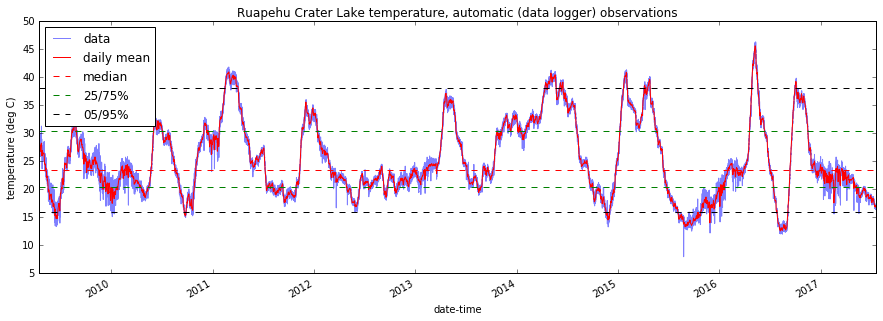

In [6]:
temp = df[' t (C)'].plot(figsize=(15,5), title='Ruapehu Crater Lake temperature, automatic (data logger) observations', alpha = 0.5, label='data')
temp.set_ylabel("temperature (deg C)")
dfday[' t (C)'].plot(ax=temp, color='red', label='daily mean')

temp.axhline(dfday[' t (C)'].median(), color='red', linestyle='dashed', linewidth=1, label='median')

temp.axhline(dfday[' t (C)'].quantile(q=0.25), color='green', linestyle='dashed', linewidth=1, label='25/75%')
temp.axhline(dfday[' t (C)'].quantile(q=0.75), color='green', linestyle='dashed', linewidth=1)

temp.axhline(dfday[' t (C)'].quantile(q=0.05), color='black', linestyle='dashed', linewidth=1, label='05/95%')
temp.axhline(dfday[' t (C)'].quantile(q=0.95), color='black', linestyle='dashed', linewidth=1)

tp = temp.legend(loc='best')

In [7]:
fig = tp.get_figure()
fig.savefig('rcltemp_plot.png', dpi=200)

histogram, one bin per degree

Bins for histograms, standardise across all plots

In [8]:
bins = np.arange(8,61,1)

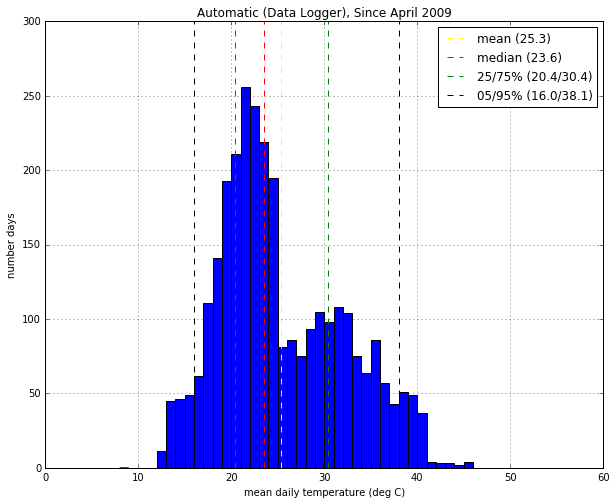

In [9]:
hist = dfday[' t (C)'].hist(bins=bins, figsize=(10,8))
hist.set_ylabel("number days")
hist.set_xlabel("mean daily temperature (deg C)")

mean = dfday[' t (C)'].mean()
meanstr = '{:.1f}'.format(mean)
hist.axvline(mean, color='yellow', linestyle='dashed', linewidth=1, label='mean ('+meanstr+')')

median = dfday[' t (C)'].median()
medianstr = '{:.1f}'.format(median)
hist.axvline(median, color='red', linestyle='dashed', linewidth=1, label='median ('+medianstr+')')

q25 = dfday[' t (C)'].quantile(q=0.25)
q25str = '{:.1f}'.format(q25)
hist.axvline(q25, color='green', linestyle='dashed', linewidth=1)
q75 = dfday[' t (C)'].quantile(q=0.75)
q75str = '{:.1f}'.format(q75)
hist.axvline(q75, color='green', linestyle='dashed', linewidth=1, label='25/75% ('+q25str+'/'+q75str+')')

q05 = dfday[' t (C)'].quantile(q=0.05)
q05str = '{:.1f}'.format(q05)
hist.axvline(q05, color='black', linestyle='dashed', linewidth=1)
q95 = dfday[' t (C)'].quantile(q=0.95)
q95str = '{:.1f}'.format(q95)
hist.axvline(q95, color='black', linestyle='dashed', linewidth=1, label='05/95% ('+q05str+'/'+q95str+')')

hist.set_title("Automatic (Data Logger), Since April 2009")
hp = hist.legend(loc='best')


In [10]:
fig = hp.get_figure()
fig.savefig('rcltemp_hist.png', dpi=200)

**Manual**

All manual measured temperatures, regardless of siteID. There are some 'double-up' manual temperatures from 1991 to the 1995 eruption. The same observation has a methodID of both therm and thermcoup. This arose because of separate copies of data being held by different staff. This problem will be rectrified at a later date. 

In [11]:
#outlet, thermometer
url = 'http://fits.geonet.org.nz/observation?networkID=VO&siteID=RU001&typeID=t&methodID=therm'
dfm = pd.read_csv(url, parse_dates=['date-time'], index_col=['date-time'], usecols = ['date-time', ' t (C)'])

#outlet, thermocouple
url = 'http://fits.geonet.org.nz/observation?networkID=VO&siteID=RU001&typeID=t&methodID=thermcoup'
dfm2 = pd.read_csv(url, parse_dates=['date-time'], index_col=['date-time'], usecols = ['date-time', ' t (C)'])
dfm = dfm.append(dfm2)

#centre, thermocouple
url = 'http://fits.geonet.org.nz/observation?networkID=VO&siteID=RU003&typeID=t&methodID=thermcoup'
dfm3 = pd.read_csv(url, parse_dates=['date-time'], index_col=['date-time'], usecols = ['date-time', ' t (C)'])
dfm = dfm.append(dfm3)

#north, thermocouple
url = 'http://fits.geonet.org.nz/observation?networkID=VO&siteID=RU004&typeID=t&methodID=thermcoup'
dfm4 = pd.read_csv(url, parse_dates=['date-time'], index_col=['date-time'], usecols = ['date-time', ' t (C)'])
dfm = dfm.append(dfm4)

In [12]:
dfm[' t (C)'].describe()

count    821.000000
mean      29.619488
std       10.697933
min        9.000000
25%       21.500000
50%       28.300000
75%       36.000000
max       69.000000
Name:  t (C), dtype: float64

In [13]:
dfm.head()

,t (C)
date-time,
1950-03-01,24.4
1954-02-14,22.3
1954-02-17,21.1
1954-10-22,38.0
1955-12-30,25.0


Remove observations following the 1995 eruption when the measured temperatures do not represent a lake. 

In [14]:
dfmu = dfm[(dfm.index<='1995-09-20 00:00:00')|(dfm.index>='2000-01-01 00:00:00')]

In [15]:
dfmu[' t (C)'].describe()

count    797.000000
mean      28.766625
std        9.606869
min        9.000000
25%       21.400000
50%       28.000000
75%       35.100000
max       60.000000
Name:  t (C), dtype: float64

Time-series plot, raw data, daily mean values, superimpose median (red), 0.25, 0.75 (green), 0.05, 0.95 (black). Plot all, including post-1995 data, but calculate statistics excluding those.

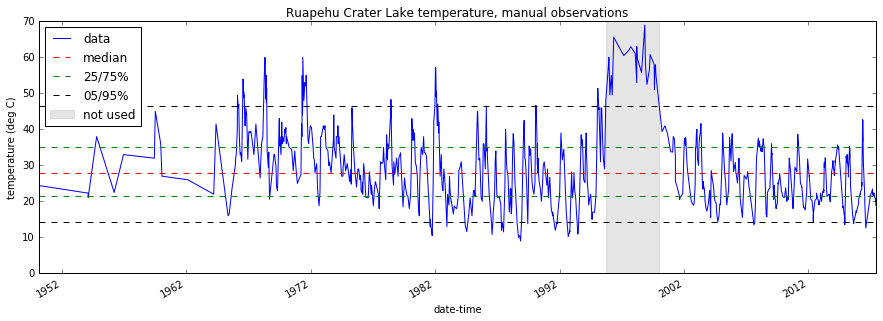

In [16]:
tempm = dfm[' t (C)'].plot(figsize=(15,5), title='Ruapehu Crater Lake temperature, manual observations', label='data')
tempm.set_ylabel("temperature (deg C)")

tempm.axhline(dfmu[' t (C)'].median(), color='red', linestyle='dashed', linewidth=1, label='median')

tempm.axhline(dfmu[' t (C)'].quantile(q=0.25), color='green', linestyle='dashed', linewidth=1, label='25/75%')
tempm.axhline(dfmu[' t (C)'].quantile(q=0.75), color='green', linestyle='dashed', linewidth=1)

tempm.axhline(dfmu[' t (C)'].quantile(q=0.05), color='black', linestyle='dashed', linewidth=1, label='05/95%')
tempm.axhline(dfmu[' t (C)'].quantile(q=0.95), color='black', linestyle='dashed', linewidth=1)

tempm.axvspan('1995-09-20', '2000-01-01', alpha=0.2, color='gray', label='not used') #grey shade unused observations

tp =tempm.legend(loc='best')

fig = tp.get_figure()
fig.savefig('rcltemp_manual_plot.png', dpi=200)

histogram, one bin per degree

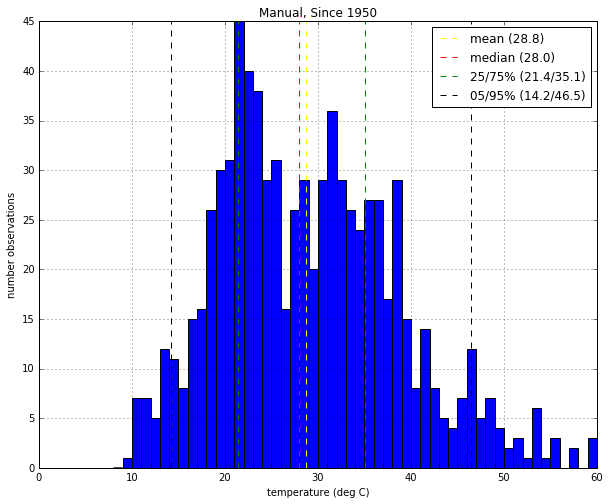

In [17]:
hist = dfmu[' t (C)'].hist(bins=bins, figsize=(10,8))
hist.set_ylabel("number observations")
hist.set_xlabel("temperature (deg C)")

mean = dfmu[' t (C)'].mean()
meanstr = '{:.1f}'.format(mean)
hist.axvline(mean, color='yellow', linestyle='dashed', linewidth=1, label='mean ('+meanstr+')')

median = dfmu[' t (C)'].median()
medianstr = '{:.1f}'.format(median)
hist.axvline(median, color='red', linestyle='dashed', linewidth=1, label='median ('+medianstr+')')

q25 = dfmu[' t (C)'].quantile(q=0.25)
q25str = '{:.1f}'.format(q25)
hist.axvline(q25, color='green', linestyle='dashed', linewidth=1)
q75 = dfmu[' t (C)'].quantile(q=0.75)
q75str = '{:.1f}'.format(q75)
hist.axvline(q75, color='green', linestyle='dashed', linewidth=1, label='25/75% ('+q25str+'/'+q75str+')')

q05 = dfmu[' t (C)'].quantile(q=0.05)
q05str = '{:.1f}'.format(q05)
hist.axvline(q05, color='black', linestyle='dashed', linewidth=1)
q95 = dfmu[' t (C)'].quantile(q=0.95)
q95str = '{:.1f}'.format(q95)
hist.axvline(q95, color='black', linestyle='dashed', linewidth=1, label='05/95% ('+q05str+'/'+q95str+')')

hist.set_title("Manual, Since 1950")
hp = hist.legend(loc='best')

fig = hp.get_figure()
fig.savefig('rcltemp_manual_hist.png', dpi=200)

**Comparison, Automatic vs Manual**

In [18]:
dfday.rename(columns={" t (C)": "auto"}, inplace=True)
dfmu.rename(columns={" t (C)": "man"}, inplace=True)

/usr/local/lib/python2.7/dist-packages/pandas/core/frame.py:2746: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  **kwargs)


In [19]:
dfc = pd.concat([dfday, dfmu])

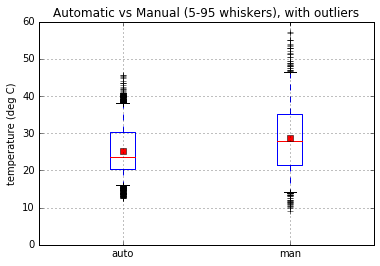

In [20]:
bp = dfc.boxplot(whis=[5,95], showmeans=True)#, showfliers=False)
bp.set_ylabel('temperature (deg C)')
bp.set_title('Automatic vs Manual (5-95 whiskers), with outliers')

fig = bp.get_figure()
fig.savefig('rcltemp_compare_box.png', dpi=200)

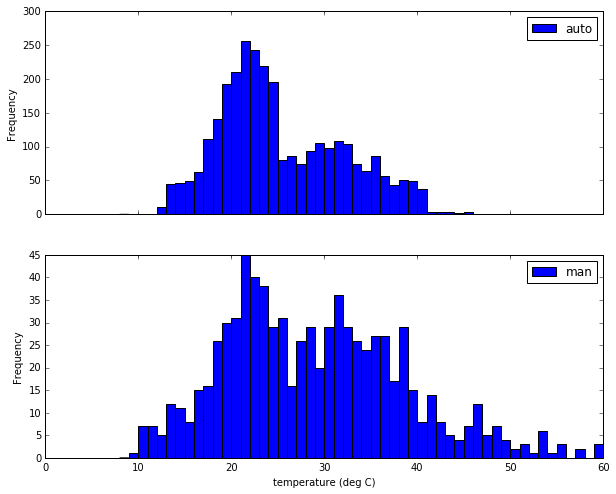

In [21]:
fig, (ax0, ax1) = plt.subplots(nrows=2,ncols=1, sharex=True, figsize=(10,8))
hc = dfc.plot(kind='hist', x='auto', bins=bins, ax=ax1)
dfc.plot(kind='hist', x='man', bins=bins, ax=ax0)
hc.set_xlabel("temperature (deg C)")

fig = hc.get_figure()
fig.savefig('rcltemp_compare_hist.png', dpi=200)